# Before harmonization

In [2]:
import pandas as pd

eicu_original = pd.read_csv("../data/one_hot_age_gender_eicu_data.csv")
selected_hospitals = [167, 420, 199, 458, 252, 165, 148, 281, 449, 283]
eicu_original = eicu_original[eicu_original['hospitalid'].isin(selected_hospitals)]
eicu_original.head()

,patientunitstayid,hospitalid,Death,unitdischargeoffset,ventilation,sepsis,Gender,< 30,30 - 39,40 - 49,...,traMADol,traMADol 50 MG TAB,traZODone,vancomycin,vancomycin hcl 1000 mg iv solr,vancomycin in D5W (VANCOCIN) ivpb 1 g,warfarin,warfarin sodium (COUMADIN) tab 5 mg,zolpiDEM 5 MG TAB,zolpidem
10896,534967.0,167.0,0.0,3139.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10897,535142.0,167.0,0.0,6590.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10901,535511.0,167.0,0.0,5876.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10902,535557.0,148.0,0.0,18274.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10906,535613.0,167.0,0.0,13509.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
original_ids = eicu_original.iloc[:, 1].to_numpy()
original_drug = eicu_original.iloc[:, 15:].to_numpy()

In [4]:
original_drug.shape

(13816, 1411)

In [5]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import numpy as np

def draw_umap(x, n_neighbors, min_dist, title):

    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
                        random_state=np.random.RandomState(25),
                        transform_seed=np.random.RandomState(25))
    principal_components = reducer.fit_transform(x)
    print(principal_components.shape)

    final_np = np.hstack((principal_components, original_ids[:, None]))
    print(final_np.shape)

    plt.figure(figsize=(6, 5))

    palette = [
        '#ff3333',   # Red
        '#ff6633',   # Orange Red
        '#ffcc00',   # Gold Yellow
        '#6cf56c',   # Fresh Green
        '#008000',   # Dark Green
        '#00cccc',   # Dark Turquoise
        '#325bfa',   # Royal Blue
        '#6633cc',   # Blue Violet
        '#808080',   # Grey
        '#ff66ba'    # Deep Pink
    ]
    colors = sns.color_palette(palette, n_colors=10)
    legend_elements = []
    for id, hospital_id in enumerate(list(np.unique(final_np[:, 2]))):

        color = colors[id]

        print("id: {} hospital id: {}, color: {}".format(id, hospital_id, color))

        scatter_rows = final_np[np.where(final_np[:, 2] == hospital_id)]
        # scatter_rows = np.float32(scatter_rows[:, :2])

        plot = plt.scatter(scatter_rows[:, 0], scatter_rows[:, 1], label=hospital_id, color=color, alpha=0.15, s=1.2)
        legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=int(hospital_id))
        legend_elements.append(legend_element)

    plt.title(title)
    plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.grid(True)
    plt.show()

    return final_np

/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(13816, 2)
(13816, 3)
id: 0 hospital id: 148.0, color: (1.0, 0.2, 0.2)
id: 1 hospital id: 165.0, color: (1.0, 0.4, 0.2)
id: 2 hospital id: 167.0, color: (1.0, 0.8, 0.0)
id: 3 hospital id: 199.0, color: (0.4235294117647059, 0.9607843137254902, 0.4235294117647059)
id: 4 hospital id: 252.0, color: (0.0, 0.5019607843137255, 0.0)
id: 5 hospital id: 281.0, color: (0.0, 0.8, 0.8)
id: 6 hospital id: 283.0, color: (0.19607843137254902, 0.3568627450980392, 0.9803921568627451)
id: 7 hospital id: 420.0, color: (0.4, 0.2, 0.8)
id: 8 hospital id: 449.0, color: (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)
id: 9 hospital id: 458.0, color: (1.0, 0.4, 0.7294117647058823)


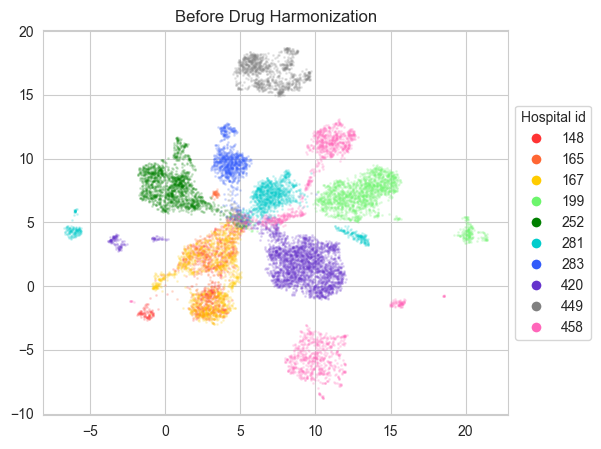

In [6]:
final_np = draw_umap(original_drug, 5, 0.5, title="Before Drug Harmonization")

# Load Data

In [1]:
import pandas as pd

eicu = pd.read_csv("../data/eicu_mimic_drug_lab.csv")
print(eicu.shape)
print("Total hospitals: ", len(eicu.hospitalid.unique()))
print("Total drugs: ", len(eicu.columns[4:-31]))
print("Total features: ", len(eicu.columns[4:]))
eicu.head()

(39728, 272)
Total hospitals:  12
Total drugs:  237
Total features:  268


,patientunitstayid,hospitalid,death,length_of_stay,acetamin,biotene,compazine,ferrous,imdur,lidocaine,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,79168,-1.0,0.0,0.070992,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-0.896483,1.848991,-0.180555,1.659113,0.104037,0.000000,2.202687,0.0
1,72723,-1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.986119,0.490553,-0.235778,0.000000,-1.099862,-0.024975,1.355242,0.017131,-1.022925,0.0
2,31288,-1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.423901,0.287244,-0.164078,0.000000,0.479571,0.0
3,68501,-1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.255570,-0.670585,0.000000,0.000000,0.062791,-0.006052,-0.730099,-0.691749,0.350242,0.0
4,84686,-1.0,0.0,0.142262,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.194317,-0.471832,0.000000,0.000000,-0.964670,-0.390806,-0.610936,-0.975302,-0.331904,0.0


In [8]:
eicu.columns[4:]

Index(['acetamin', 'biotene', 'compazine', 'ferrous', 'imdur', 'lidocaine',
       'milk of magnesia', 'nystatin', 'prochlorperazine', 'tamsulosin',
       ...
       'paco2', 'ph', 'albu_lab', 'bands', 'bun', 'hct', 'inr', 'lactate',
       'platelets', 'wbc'],
      dtype='object', length=268)

In [9]:
eicu.columns[-12:]

Index(['o2sat', 'pao2', 'paco2', 'ph', 'albu_lab', 'bands', 'bun', 'hct',
       'inr', 'lactate', 'platelets', 'wbc'],
      dtype='object')

In [10]:
eicu.columns[-20:-12]

Index(['< 30', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79',
       '80 - 89', '> 89'],
      dtype='object')

In [11]:
eicu.columns[-22:-20]

Index(['sex_is_male', 'sex_is_female'], dtype='object')

In [12]:
eicu.columns[-27:-22]

Index(['race_african', 'race_hispanic', 'race_caucasion', 'race_asian',
       'race_native'],
      dtype='object')

In [13]:
eicu.columns[[-27,-26,-24,-23]]

Index(['race_african', 'race_hispanic', 'race_asian', 'race_native'], dtype='object')

In [14]:
eicu.columns[[245,246,248,249]]

Index(['race_african', 'race_hispanic', 'race_asian', 'race_native'], dtype='object')

In [15]:
eicu.columns[-31:-27]

Index(['bmi_underweight', 'bmi_normal', 'bmi_overweight', 'bmi_obesity'], dtype='object')

In [16]:
eicu.columns[4:-31]

Index(['acetamin', 'biotene', 'compazine', 'ferrous', 'imdur', 'lidocaine',
       'milk of magnesia', 'nystatin', 'prochlorperazine', 'tamsulosin',
       ...
       'succinylcholine', 'bayer chewable', 'clopidogrel', 'fentanyl',
       'ibuprofen', 'levothyroxine', 'midodrine', 'norvasc', 'prinivil',
       'tacrolimus'],
      dtype='object', length=237)

In [17]:
# hospital_counts = eicu.groupby('hospitalid').size().reset_index(name='count')
# count = hospital_counts.sort_values(by='count', ascending=False)
# selected_hospitals = count[count["count"] > 2000]
# filtered_hospital_ids = []
# for hospitalid in selected_hospitals.hospitalid:
#     filtered = eicu[eicu["hospitalid"] == hospitalid]
#     death_sum = filtered["death"].sum()
#     ventilator_sum = filtered["ventilation"].sum()
#     sepsis_sum = filtered["sepsis"].sum()
#     if death_sum / len(filtered) >= 0.03 and ventilator_sum / len(filtered) >= 0.03 and sepsis_sum / len(filtered) >= 0.03:
#         filtered_hospital_ids.append(hospitalid)
#
# print([int(x) for x in filtered_hospital_ids])
# print(len(filtered_hospital_ids))

# Filter Data

In [18]:
selected_hospitals = [167, 420, 199, 458, 252, 165, 148, 281, 449, 283]
selected_eicu = eicu[eicu['hospitalid'].isin(selected_hospitals)]
selected_eicu.shape

(34755, 272)

# Visualization

In [19]:
def calculate_death_alive_count(label):
    death_patients_count, alive_patients_count = [], []
    for hospital in selected_hospitals:
        hospital_df = eicu[eicu["hospitalid"] == hospital]
        alive_patients_count.append(len(hospital_df[hospital_df[label] == 0]))
        death_patients_count.append(len(hospital_df[hospital_df[label] == 1]))
    return death_patients_count, alive_patients_count

## Ventilation

In [20]:
# import matplotlib.pyplot as plt
#
# use_ventilation, no_ventilation = calculate_death_alive_count("ventilation")
# print("Use ventilation patients: ", use_ventilation)
# print("No ventilation patients: ", no_ventilation)
#
# selected_hospital_labels = [str(int(x)) for x in selected_hospitals]
#
# # plt.figure(figsize=(10,6))
# plt.title("Patients count in hospitals")
# plt.bar(selected_hospital_labels, no_ventilation, label='Not use ventilation', color="#5faffa")
# plt.bar(selected_hospital_labels, use_ventilation, bottom=no_ventilation, label='Use ventilation', color="#fa8296")
# plt.legend()
# plt.xlabel("Hospitals")
# plt.ylabel("Patients count")
# plt.show()

In [21]:
# import matplotlib.pyplot as plt
#
# has_sepsis, no_sepsis = calculate_death_alive_count("sepsis")
# print("Has sepsis patients: ", has_sepsis)
# print("No sepsis patients: ", no_sepsis)
#
# selected_hospital_labels = [str(int(x)) for x in selected_hospitals]
#
# # plt.figure(figsize=(10,6))
# plt.title("Patients count in hospitals")
# plt.bar(selected_hospital_labels, no_sepsis, label='No sepsis', color="#5faffa")
# plt.bar(selected_hospital_labels, has_sepsis, bottom=no_sepsis, label='Has sepsis', color="#fa8296")
# plt.legend()
# plt.xlabel("Hospitals")
# plt.ylabel("Patients count")
# plt.show()

Death patients:  [257, 438, 268, 335, 312, 135, 116, 134, 160, 126]
Alive patients:  [5835, 4241, 3972, 3366, 3059, 2918, 2765, 2397, 1950, 1971]


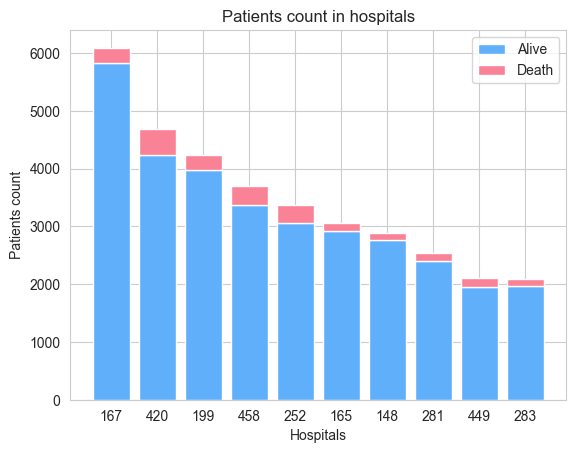

In [22]:
import matplotlib.pyplot as plt

death, alive = calculate_death_alive_count("death")
print("Death patients: ", death)
print("Alive patients: ", alive)

selected_hospital_labels = [str(int(x)) for x in selected_hospitals]

# plt.figure(figsize=(10,6))
plt.title("Patients count in hospitals")
plt.bar(selected_hospital_labels, alive, label='Alive', color="#5faffa")
plt.bar(selected_hospital_labels, death, bottom=alive, label='Death', color="#fa8296")
plt.legend()
plt.xlabel("Hospitals")
plt.ylabel("Patients count")
plt.show()

In [23]:
eicu_time = pd.read_csv("../data/eicu_mimic_lab_time.csv")

In [24]:
eicu_time.head()

,Unnamed: 0,patientunitstayid,hospitalid,time_window,death,ventilator,sepsis,acetamin,biotene,compazine,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,0.0,107.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.235778,0.0,2.361057,-0.753484,-0.968423,0.0,-0.669173,0.0
1,0.0,107.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,-0.062819,0.000000,0.0,0.000000,0.0
2,0.0,107.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,2.361057,-0.450727,0.000000,0.0,-0.859362,0.0
3,0.0,107.0,-1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.239938,0.000000,0.0,0.000000,0.0
4,0.0,107.0,-1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.441329,-0.895402,-0.968423,0.0,-0.691995,0.0


In [25]:
# Calculate death person percentage in each hospital
total_death_percentage = []
for hospital_id in eicu['hospitalid'].unique():
    hospital_data = eicu[eicu["hospitalid"] == hospital_id]
    death_sum = hospital_data["death"].sum()
    death_percentage = death_sum / len(hospital_data["patientunitstayid"].unique())
    total_death_percentage.append(death_percentage)
    print("Hospital id: ", hospital_id, "Death percentage: ", death_percentage)

Hospital id:  -1.0 Death percentage:  0.09973404255319149
Hospital id:  -2.0 Death percentage:  0.019522776572668113
Hospital id:  165.0 Death percentage:  0.04421880117916803
Hospital id:  167.0 Death percentage:  0.04218647406434668
Hospital id:  148.0 Death percentage:  0.040263797292606734
Hospital id:  199.0 Death percentage:  0.06320754716981132
Hospital id:  252.0 Death percentage:  0.0925541382379116
Hospital id:  281.0 Death percentage:  0.05294350059265113
Hospital id:  283.0 Death percentage:  0.060085836909871244
Hospital id:  420.0 Death percentage:  0.09360974567215218
Hospital id:  449.0 Death percentage:  0.07582938388625593
Hospital id:  458.0 Death percentage:  0.09051607673601729


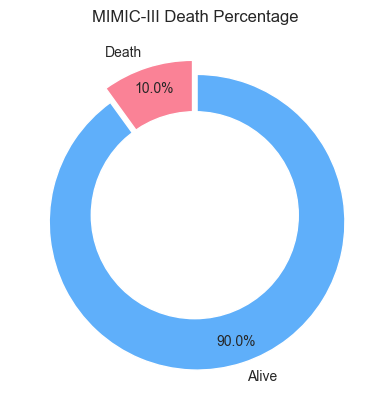

In [26]:
mimic_hospital_data = eicu[eicu["hospitalid"] == -1]
mimic_death_sum = mimic_hospital_data["death"].sum()
mimic_death_percentage = mimic_death_sum / len(mimic_hospital_data["patientunitstayid"].unique())
# Plot donut chart
labels = ['Death', 'Alive']
sizes = [mimic_death_percentage, 1 - mimic_death_percentage]

colors = ["#fa8296", "#5faffa"]

explode = (0.05, 0.05)

# Pie Chart
_, _, autotexts = plt.pie(sizes, colors=colors, labels=labels,
                          autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=90)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('MIMIC-III Death Percentage')
plt.show()

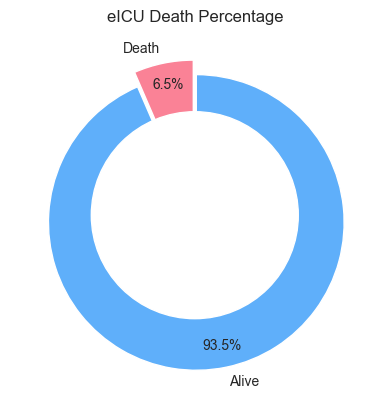

In [27]:
eicu_hospital_data = eicu[eicu["hospitalid"] != -1]
eicu_death_sum = eicu_hospital_data["death"].sum()
eicu_death_percentage = eicu_death_sum / len(eicu_hospital_data["patientunitstayid"].unique())
# Plot donut chart
labels = ['Death', 'Alive']
sizes = [eicu_death_percentage, 1 - eicu_death_percentage]

colors = ["#fa8296", "#5faffa"]

explode = (0.05, 0.05)

# Pie Chart
_, _, autotexts = plt.pie(sizes, colors=colors, labels=labels,
                          autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=90)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('eICU Death Percentage')
plt.show()

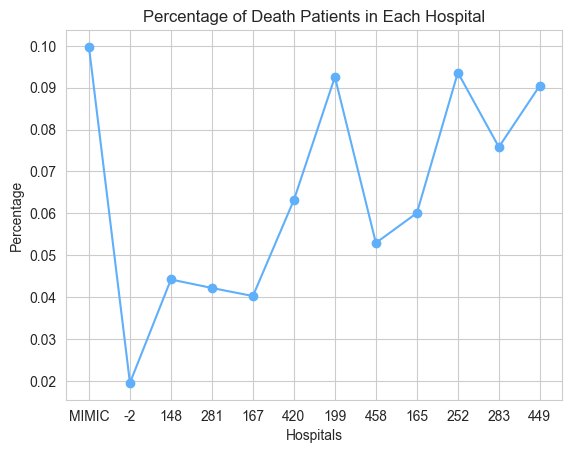

In [28]:
# Plot percentage of death patients in each hospital
hospital_labels = []
for hospital_id in eicu_time['hospitalid'].unique():
    if hospital_id == -1:
        hospital_labels.append("MIMIC")
    else:
        hospital_labels.append(str(int(hospital_id)))

plt.title("Percentage of Death Patients in Each Hospital")
plt.plot(hospital_labels, total_death_percentage, color="#5faffa", marker='o')
plt.xlabel("Hospitals")
plt.ylabel("Percentage")
plt.show()

In [29]:
# Calculate sepsis person percentage in each hospital
total_sepsis_percentage = []
for hospital_id in eicu_time['hospitalid'].unique():
    hospital_data = eicu_time[eicu_time["hospitalid"] == hospital_id]

    sepsis_counts = hospital_data.groupby('patientunitstayid')['sepsis'].sum()
    sepsis_sum = sepsis_counts[sepsis_counts > 0].count()

    sepsis_percentage = sepsis_sum / len(hospital_data["patientunitstayid"].unique())
    total_sepsis_percentage.append(sepsis_percentage)
    print("Hospital id: ", hospital_id, "Sepsis percentage: ", sepsis_percentage)

Hospital id:  -1.0 Sepsis percentage:  0.024379432624113476
Hospital id:  -2.0 Sepsis percentage:  0.0021691973969631237
Hospital id:  148.0 Sepsis percentage:  0.13328705310656022
Hospital id:  281.0 Sepsis percentage:  0.150138285262742
Hospital id:  167.0 Sepsis percentage:  0.09093893630991465
Hospital id:  420.0 Sepsis percentage:  0.21008762556101732
Hospital id:  199.0 Sepsis percentage:  0.10212264150943397
Hospital id:  458.0 Sepsis percentage:  0.05322885706565793
Hospital id:  165.0 Sepsis percentage:  0.09695381591876842
Hospital id:  252.0 Sepsis percentage:  0.1824384455651142
Hospital id:  283.0 Sepsis percentage:  0.18454935622317598
Hospital id:  449.0 Sepsis percentage:  0.07677725118483412


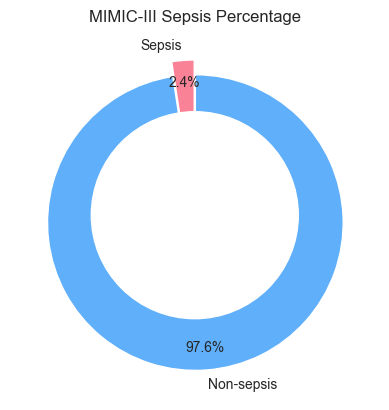

In [30]:
mimic_hospital_data = eicu_time[eicu_time["hospitalid"] == -1]
mimic_sepsis_counts = mimic_hospital_data.groupby('patientunitstayid')['sepsis'].sum()
mimic_sepsis_sum = mimic_sepsis_counts[mimic_sepsis_counts > 0].count()
mimic_sepsis_percentage = mimic_sepsis_sum / len(mimic_hospital_data["patientunitstayid"].unique())
# Plot donut chart
labels = ['Sepsis', 'Non-sepsis']
sizes = [mimic_sepsis_percentage, 1 - mimic_sepsis_percentage]

colors = ["#fa8296", "#5faffa"]

explode = (0.05, 0.05)

# Pie Chart
_, _, autotexts = plt.pie(sizes, colors=colors, labels=labels,
                          autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=90)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('MIMIC-III Sepsis Percentage')
plt.show()

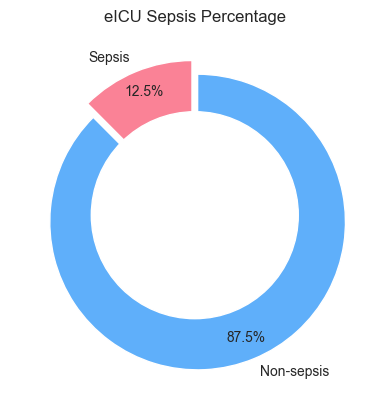

In [31]:
eicu_hospital_data = eicu_time[eicu_time["hospitalid"] != -1]
eicu_sepsis_counts = eicu_hospital_data.groupby('patientunitstayid')['sepsis'].sum()
eicu_sepsis_sum = eicu_sepsis_counts[eicu_sepsis_counts > 0].count()
eicu_sepsis_percentage = eicu_sepsis_sum / len(eicu_hospital_data["patientunitstayid"].unique())
# Plot donut chart
labels = ['Sepsis', 'Non-sepsis']
sizes = [eicu_sepsis_percentage, 1 - eicu_sepsis_percentage]

colors = ["#fa8296", "#5faffa"]

explode = (0.05, 0.05)

# Pie Chart
_, _, autotexts = plt.pie(sizes, colors=colors, labels=labels,
                          autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=90)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('eICU Sepsis Percentage')
plt.show()

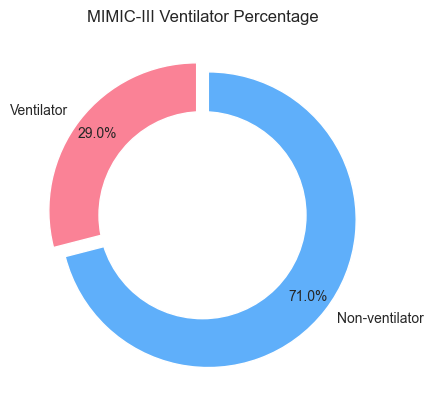

In [32]:
mimic_hospital_data = eicu_time[eicu_time["hospitalid"] == -1]
mimic_ventilator_counts = mimic_hospital_data.groupby('patientunitstayid')['ventilator'].sum()
mimic_ventilator_sum = mimic_ventilator_counts[mimic_ventilator_counts > 0].count()
mimic_ventilator_percentage = mimic_ventilator_sum / len(mimic_hospital_data["patientunitstayid"].unique())
# Plot donut chart
labels = ['Ventilator', 'Non-ventilator']
sizes = [mimic_ventilator_percentage, 1 - mimic_ventilator_percentage]

colors = ["#fa8296", "#5faffa"]

explode = (0.05, 0.05)

# Pie Chart
_, _, autotexts = plt.pie(sizes, colors=colors, labels=labels,
                          autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=90)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('MIMIC-III Ventilator Percentage')
plt.show()

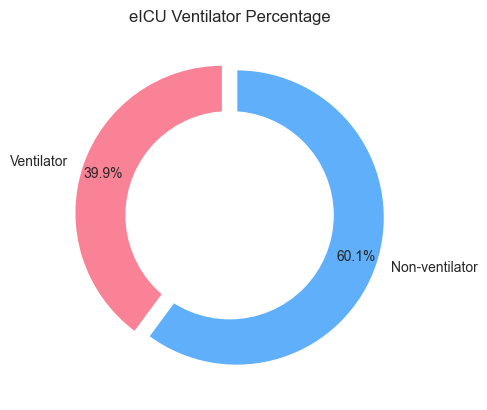

In [33]:
eicu_hospital_data = eicu_time[eicu_time["hospitalid"] != -1]
eicu_ventilator_counts = eicu_hospital_data.groupby('patientunitstayid')['ventilator'].sum()
eicu_ventilator_sum = eicu_ventilator_counts[eicu_ventilator_counts > 0].count()
eicu_ventilator_percentage = eicu_ventilator_sum / len(eicu_hospital_data["patientunitstayid"].unique())
# Plot donut chart
labels = ['Ventilator', 'Non-ventilator']
sizes = [eicu_ventilator_percentage, 1 - eicu_ventilator_percentage]

colors = ["#fa8296", "#5faffa"]

explode = (0.05, 0.05)

# Pie Chart
_, _, autotexts = plt.pie(sizes, colors=colors, labels=labels,
                          autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=90)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('eICU Ventilator Percentage')
plt.show()

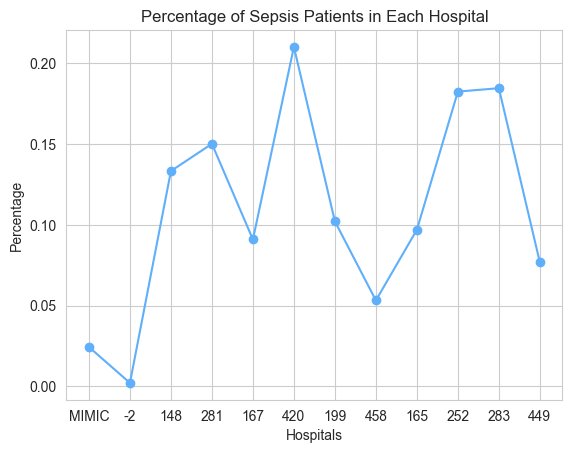

In [34]:
# Plot percentage of sepsis patients in each hospital
plt.title("Percentage of Sepsis Patients in Each Hospital")
plt.plot(hospital_labels, total_sepsis_percentage, color="#5faffa", marker='o')
plt.xlabel("Hospitals")
plt.ylabel("Percentage")
plt.show()

In [35]:
# Calculate ventilator person percentage in each hospital
total_ventilator_percentage = []
for hospital_id in eicu_time['hospitalid'].unique():
    hospital_data = eicu_time[eicu_time["hospitalid"] == hospital_id]

    ventilator_counts = hospital_data.groupby('patientunitstayid')['ventilator'].sum()
    ventilator_sum = ventilator_counts[ventilator_counts > 0].count()

    ventilator_percentage = ventilator_sum / len(hospital_data["patientunitstayid"].unique())
    total_ventilator_percentage.append(ventilator_percentage)
    print("Hospital id: ", hospital_id, "Ventilator percentage: ", ventilator_percentage)

Hospital id:  -1.0 Ventilator percentage:  0.29011524822695034
Hospital id:  -2.0 Ventilator percentage:  0.9262472885032538
Hospital id:  148.0 Ventilator percentage:  0.29920166608816384
Hospital id:  281.0 Ventilator percentage:  0.4053733702094034
Hospital id:  167.0 Ventilator percentage:  0.24162836506894286
Hospital id:  420.0 Ventilator percentage:  0.4815131438341526
Hospital id:  199.0 Ventilator percentage:  0.4077830188679245
Hospital id:  458.0 Ventilator percentage:  0.4463658470683599
Hospital id:  165.0 Ventilator percentage:  0.24402227317392727
Hospital id:  252.0 Ventilator percentage:  0.4319193117769208
Hospital id:  283.0 Ventilator percentage:  0.4234620886981402
Hospital id:  449.0 Ventilator percentage:  0.7251184834123223


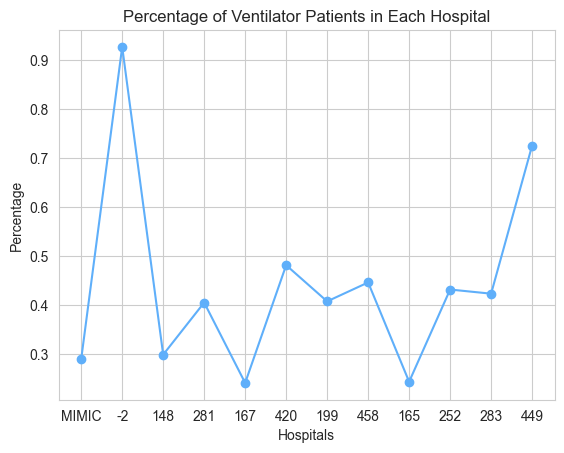

In [36]:
# Plot percentage of ventilator patients in each hospital
plt.title("Percentage of Ventilator Patients in Each Hospital")
plt.plot(hospital_labels, total_ventilator_percentage, color="#5faffa", marker='o')
plt.xlabel("Hospitals")
plt.ylabel("Percentage")
plt.show()

# Covariate Shift Analysis

We have covariate shift problems in the drugs taken by patients

In [37]:
import numpy as np

selected_eicu = (eicu[eicu['hospitalid'].isin(selected_hospitals)]).to_numpy()
ids = selected_eicu[:, 1]
drugs = selected_eicu[:, 4:-31]
all_features = selected_eicu[:, 4:]

print(ids)
print(drugs.shape)
print(all_features.shape)

[165. 165. 167. ... 458. 458. 458.]
(34755, 237)
(34755, 268)


In [38]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

def draw_umap(x, n_neighbors, min_dist, title):

    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
                        random_state=np.random.RandomState(25),
                        transform_seed=np.random.RandomState(25))
    principal_components = reducer.fit_transform(x)
    print(principal_components.shape)

    final_np = np.hstack((principal_components, ids[:, None]))
    print(final_np.shape)

    plt.figure(figsize=(6, 5))

    palette = [
        '#ff3333',   # Red
        '#ff6633',   # Orange Red
        '#ffcc00',   # Gold Yellow
        '#6cf56c',   # Fresh Green
        '#008000',   # Dark Green
        '#00cccc',   # Dark Turquoise
        '#325bfa',   # Royal Blue
        '#6633cc',   # Blue Violet
        '#808080',   # Grey
        '#ff66ba'    # Deep Pink
    ]
    colors = sns.color_palette(palette, n_colors=10)
    legend_elements = []
    for id, hospital_id in enumerate(list(np.unique(final_np[:, 2]))):

        color = colors[id]

        print("id: {} hospital id: {}, color: {}".format(id, hospital_id, color))

        scatter_rows = final_np[np.where(final_np[:, 2] == hospital_id)]
        # scatter_rows = np.float32(scatter_rows[:, :2])

        plot = plt.scatter(scatter_rows[:, 0], scatter_rows[:, 1], label=hospital_id, color=color, alpha=0.15, s=1.2)
        legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=int(hospital_id))
        legend_elements.append(legend_element)

    plt.title(title)
    plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.grid(True)
    plt.show()

    return final_np

/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(34755, 2)
(34755, 3)
id: 0 hospital id: 148.0, color: (1.0, 0.2, 0.2)
id: 1 hospital id: 165.0, color: (1.0, 0.4, 0.2)
id: 2 hospital id: 167.0, color: (1.0, 0.8, 0.0)
id: 3 hospital id: 199.0, color: (0.4235294117647059, 0.9607843137254902, 0.4235294117647059)
id: 4 hospital id: 252.0, color: (0.0, 0.5019607843137255, 0.0)
id: 5 hospital id: 281.0, color: (0.0, 0.8, 0.8)
id: 6 hospital id: 283.0, color: (0.19607843137254902, 0.3568627450980392, 0.9803921568627451)
id: 7 hospital id: 420.0, color: (0.4, 0.2, 0.8)
id: 8 hospital id: 449.0, color: (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)
id: 9 hospital id: 458.0, color: (1.0, 0.4, 0.7294117647058823)


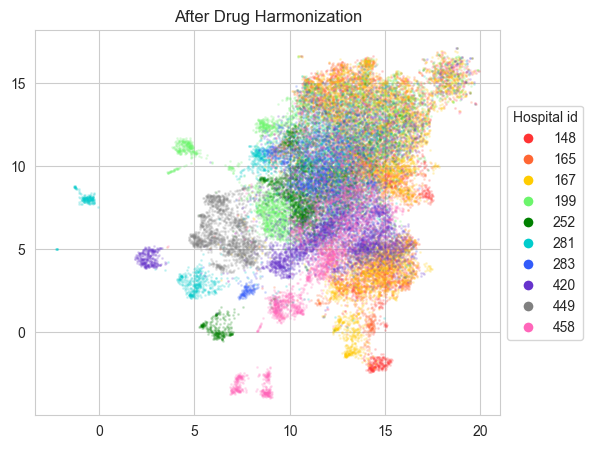

In [39]:
final_np = draw_umap(drugs, 5, 0.5, title="After Drug Harmonization")

In [40]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

eicu_mimic = eicu.to_numpy()
mimic_ids = eicu_mimic[:, 1]

def draw_mimic_umap(x, n_neighbors, min_dist, title):

    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
                        random_state=np.random.RandomState(25),
                        transform_seed=np.random.RandomState(25))
    principal_components = reducer.fit_transform(x)
    print(principal_components.shape)

    final_np = np.hstack((principal_components, mimic_ids[:, None]))
    print(final_np.shape)

    plt.figure(figsize=(6, 5))

    palette = [
        '#ff3333',   # Red
        '#ff7d52',   # Orange Red
        '#ffcc00',   # Gold Yellow
        '#6cf56c',   # Fresh Green
        '#008000',   # Dark Green
        '#00cccc',   # Dark Turquoise
        '#325bfa',   # Royal Blue
        '#6633cc',   # Blue Violet
        '#808080',   # Grey
        '#ff66ba',    # Deep Pink
        '#c9581a'    # Brown
    ]
    
    id_mapping = {
        -1: 10,
        -2: 10,
        167: 0,
        420: 1,
        199: 2,
        458: 3,
        252: 4,
        165: 5,
        148: 6,
        281: 7,
        449: 8,
        283: 9
    }

    colors = sns.color_palette(palette, n_colors=11)
    legend_elements = []

    # mimic_scatter_rows = final_np[np.where(final_np[:, 2] == -1)]
    # mimic_plot = plt.scatter(mimic_scatter_rows[:, 0], mimic_scatter_rows[:, 1], label="MIMIC", color="#6633cc", alpha=0.15, s=1.2)
    # mimic_legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#6633cc", markersize=8, label="MIMIC")
    # legend_elements.append(mimic_legend_element)
    #
    # eicu_scatter_rows = final_np[np.where(final_np[:, 2] != -1)]
    # eicu_plot = plt.scatter(eicu_scatter_rows[:, 0], eicu_scatter_rows[:, 1], label="eICU", color="#a6a6a6", alpha=0.05, s=1.2)
    # eicu_legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#a6a6a6", markersize=8, label="eICU")
    # legend_elements.append(eicu_legend_element)

    for id, hospital_id in enumerate(list(np.unique(final_np[:, 2]))):
        
        id = id_mapping[hospital_id]

        color = colors[id]
        
        print("id: {} hospital id: {}, color: {}".format(id, hospital_id, color))

        scatter_rows = final_np[np.where(final_np[:, 2] == hospital_id)]

        if hospital_id == -1 or hospital_id == -2:
            hospital_label = "mimic"
        else:
            hospital_label = int(hospital_id)

        plot = plt.scatter(scatter_rows[:, 0], scatter_rows[:, 1], label=hospital_label, color=color, alpha=0.1, s=1.2)
        legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=hospital_label)
        legend_elements.append(legend_element)

    plt.title(title)
    plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.grid(True)
    plt.show()

    return final_np

In [41]:
np.unique(mimic_ids)

array([ -2.,  -1., 148., 165., 167., 199., 252., 281., 283., 420., 449.,
       458.])

/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(39728, 2)
(39728, 3)
id: 10 hospital id: -2.0, color: (0.788235294117647, 0.34509803921568627, 0.10196078431372549)
id: 10 hospital id: -1.0, color: (0.788235294117647, 0.34509803921568627, 0.10196078431372549)
id: 6 hospital id: 148.0, color: (0.19607843137254902, 0.3568627450980392, 0.9803921568627451)
id: 5 hospital id: 165.0, color: (0.0, 0.8, 0.8)
id: 0 hospital id: 167.0, color: (1.0, 0.2, 0.2)
id: 2 hospital id: 199.0, color: (1.0, 0.8, 0.0)
id: 4 hospital id: 252.0, color: (0.0, 0.5019607843137255, 0.0)
id: 7 hospital id: 281.0, color: (0.4, 0.2, 0.8)
id: 9 hospital id: 283.0, color: (1.0, 0.4, 0.7294117647058823)
id: 1 hospital id: 420.0, color: (1.0, 0.49019607843137253, 0.3215686274509804)
id: 8 hospital id: 449.0, color: (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)
id: 3 hospital id: 458.0, color: (0.4235294117647059, 0.9607843137254902, 0.4235294117647059)


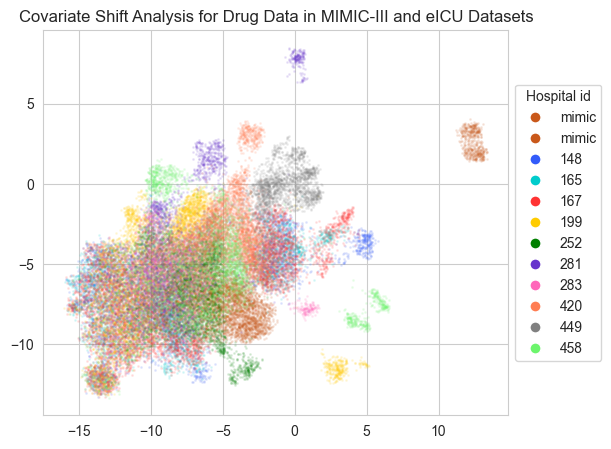

In [42]:
eicu_mimic_drugs = eicu_mimic[:, 4:-31]

final_np = draw_mimic_umap(eicu_mimic_drugs, 10, 0.9, title="Covariate Shift Analysis for Drug Data in MIMIC-III and eICU Datasets")

In [43]:
np.unique(final_np[:, 2])

array([ -2.,  -1., 148., 165., 167., 199., 252., 281., 283., 420., 449.,
       458.])

In [44]:
eicu[eicu['hospitalid'] == -1]['< 30'].sum()

248.0

In [45]:
# age_groups = eicu.columns[-20:-12]
# age_groups
# 
# def draw_mimic_umap(x, n_neighbors, min_dist, title):
# 
#     reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
#                         random_state=np.random.RandomState(25),
#                         transform_seed=np.random.RandomState(25))
#     principal_components = reducer.fit_transform(x)
#     print(principal_components.shape)
#     print(eicu.to_numpy()[:, -20:-12].shape)
# 
#     eicu_np = eicu.to_numpy()
# 
#     final_np = np.hstack((principal_components, eicu_np[:, -20:-12], mimic_ids[:, None]))
#     print(final_np.shape)
# 
#     plt.figure(figsize=(6, 5))
# 
#     palette = [
#         '#ff3333',   # Red
#         '#008000',   # Dark Green
#         '#808080',   # Grey
#     ]
#     colors = sns.color_palette(palette, n_colors=8)
#     legend_elements = []
# 
#     final_eicu_np = final_np[final_np[:, -1] != -1]
#     final_mimic_np = final_np[final_np[:, -1] == -1]
#     final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
#     final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]
# 
#     for age_group in range(len(age_groups)):
#         color = colors[age_group]
#         age_group_label = age_groups[age_group]
#         age_group_idx = age_group + 2
# 
#         print(age_group_label, age_group_idx)
# 
#         scatter_rows = final_np[final_np[:, age_group_idx] == 1]
# 
#         plot = plt.scatter(scatter_rows[:, 0], scatter_rows[:, 1], label=age_group_label, color=color, alpha=0.1, s=1.2)
#         legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=age_group_label)
#         legend_elements.append(legend_element)
# 
#     plt.title(title)
#     plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
#     # plt.grid(True)
#     plt.show()
# 
#     return final_np

In [46]:
# age_groups = eicu.columns[-20:-12]
# age_groups
# 
# def draw_mimic_umap(x, n_neighbors, min_dist, title):
# 
#     reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
#                         random_state=np.random.RandomState(25),
#                         transform_seed=np.random.RandomState(25))
#     principal_components = reducer.fit_transform(x)
#     print(principal_components.shape)
#     print(eicu.to_numpy()[:, -20:-12].shape)
# 
#     eicu_np = eicu.to_numpy()
# 
#     final_np = np.hstack((principal_components, eicu_np[:, -20:-12], mimic_ids[:, None]))
#     print(final_np.shape)
# 
#     plt.figure(figsize=(6, 5))
# 
#     palette = [
#         '#ff3333',   # Red
#         '#008000',   # Dark Green
#         '#808080',   # Grey
#     ]
#     colors = sns.color_palette(palette, n_colors=8)
#     legend_elements = []
# 
#     final_eicu_np = final_np[final_np[:, -1] != -1]
#     final_mimic_np = final_np[final_np[:, -1] == -1]
#     final_mimic_young = final_mimic_np[final_mimic_np[:, 2] == 1]
#     final_mimic_old = final_mimic_np[final_mimic_np[:, 2] != 1]
# 
#     plot = plt.scatter(final_eicu_np[:, 0], final_eicu_np[:, 1], label="eICU", color="#808080", alpha=0.1, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="eICU")
#     legend_elements.append(legend_element)
# 
#     plot = plt.scatter(final_mimic_young[:, 0], final_mimic_young[:, 1], label="MIMIC < 30", color="#ff3333", alpha=0.1, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#ff3333", markersize=8, label="MIMIC < 30")
#     legend_elements.append(legend_element)
# 
#     plot = plt.scatter(final_mimic_old[:, 0], final_mimic_old[:, 1], label="MIMIC >= 30", color="#008000", alpha=0.1, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#008000", markersize=8, label="MIMIC >= 30")
#     legend_elements.append(legend_element)
# 
#     plt.title(title)
#     plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
#     # plt.grid(True)
#     plt.show()
# 
#     return final_np

In [47]:
eicu.head()

,patientunitstayid,hospitalid,death,length_of_stay,acetamin,biotene,compazine,ferrous,imdur,lidocaine,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,79168,-1.0,0.0,0.070992,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-0.896483,1.848991,-0.180555,1.659113,0.104037,0.000000,2.202687,0.0
1,72723,-1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.986119,0.490553,-0.235778,0.000000,-1.099862,-0.024975,1.355242,0.017131,-1.022925,0.0
2,31288,-1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.423901,0.287244,-0.164078,0.000000,0.479571,0.0
3,68501,-1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.255570,-0.670585,0.000000,0.000000,0.062791,-0.006052,-0.730099,-0.691749,0.350242,0.0
4,84686,-1.0,0.0,0.142262,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.194317,-0.471832,0.000000,0.000000,-0.964670,-0.390806,-0.610936,-0.975302,-0.331904,0.0


In [48]:
# eicu_mimic_drugs = eicu_mimic[:, 3:-31]
# 
# final_np = draw_mimic_umap(eicu_mimic_drugs, 10, 0.9, title="Covariate Shift Analysis for Drug Data in MIMIC-III and eICU Datasets")

In [49]:
eicu.columns

Index(['patientunitstayid', 'hospitalid', 'death', 'length_of_stay',
       'acetamin', 'biotene', 'compazine', 'ferrous', 'imdur', 'lidocaine',
       ...
       'paco2', 'ph', 'albu_lab', 'bands', 'bun', 'hct', 'inr', 'lactate',
       'platelets', 'wbc'],
      dtype='object', length=272)

In [50]:
# feature_labels = eicu.columns[2:-12]
# 
# def draw_mimic_umap(x, n_neighbors, min_dist, title, feature_idx):
# 
#     reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
#                         random_state=np.random.RandomState(25),
#                         transform_seed=np.random.RandomState(25))
#     principal_components = reducer.fit_transform(x)
#     print(principal_components.shape)
#     print(eicu.to_numpy()[:, 2:-12].shape)
# 
#     eicu_np = eicu.to_numpy()
# 
#     final_np = np.hstack((principal_components, eicu_np[:, 2:-12], mimic_ids[:, None]))
#     print(final_np.shape)
# 
#     plt.figure(figsize=(6, 5))
# 
#     palette = [
#         '#ff3333',   # Red
#         '#008000',   # Dark Green
#         '#808080',   # Grey
#     ]
#     colors = sns.color_palette(palette, n_colors=8)
#     legend_elements = []
# 
#     final_eicu_np = final_np[final_np[:, -1] != -1]
#     final_mimic_np = final_np[final_np[:, -1] == -1]
#     final_mimic_pos = final_mimic_np[final_mimic_np[:, 2 + feature_idx] == 1]
#     final_mimic_neg = final_mimic_np[final_mimic_np[:, 2 + feature_idx] != 1]
# 
#     plot = plt.scatter(final_eicu_np[:, 0], final_eicu_np[:, 1], label="eICU & MIMIC Feature 0", color="#808080", alpha=0.05, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="eICU & MIMIC Feature 0")
#     legend_elements.append(legend_element)
# 
#     plot = plt.scatter(final_mimic_neg[:, 0], final_mimic_neg[:, 1], label="eICU & MIMIC", color="#808080", alpha=0.05, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="eICU & MIMIC")
#     legend_elements.append(legend_element)
# 
#     plot = plt.scatter(final_mimic_pos[:, 0], final_mimic_pos[:, 1], label="MIMIC {} = True".format(feature_labels[feature_idx]), color="#ff3333", alpha=0.5, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#ff3333", markersize=8, label="MIMIC {} = True".format(feature_labels[feature_idx]))
#     legend_elements.append(legend_element)
# 
#     plt.title(title)
#     plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
#     # plt.grid(True)
#     plt.show()
# 
#     return final_np

In [51]:
# eicu_mimic_drugs = eicu_mimic[:, 3:-31]
# 
# for idx, label in enumerate(feature_labels):
#     print(idx, label)
#     final_np = draw_mimic_umap(eicu_mimic_drugs, 10, 0.9, title="Covariate Shift Analysis for Drug Data Feature {} in MIMIC-III and eICU Datasets".format(label), feature_idx=idx)

In [52]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

eicu_mimic = eicu.to_numpy()
mimic_ids = eicu_mimic[:, 1]

def draw_mimic_umap(x, n_neighbors, min_dist, title):

    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
                        random_state=np.random.RandomState(25),
                        transform_seed=np.random.RandomState(25))
    principal_components = reducer.fit_transform(x)
    print(principal_components.shape)

    final_np = np.hstack((principal_components, mimic_ids[:, None]))
    print(final_np.shape)

    plt.figure(figsize=(6, 5))

    palette = [
        '#ff3333',   # Red
        '#ff7d52',   # Orange Red
        '#ffcc00',   # Gold Yellow
        '#6cf56c',   # Fresh Green
        '#008000',   # Dark Green
        '#00cccc',   # Dark Turquoise
        '#325bfa',   # Royal Blue
        '#6633cc',   # Blue Violet
        '#808080',   # Grey
        '#ff66ba',    # Deep Pink
        '#c9581a'    # Brown
    ]
    
    id_mapping = {
        -1: 10,
        -2: 10,
        167: 0,
        420: 1,
        199: 2,
        458: 3,
        252: 4,
        165: 5,
        148: 6,
        281: 7,
        449: 8,
        283: 9
    }
    
    colors = sns.color_palette(palette, n_colors=11)
    legend_elements = []

    # mimic_scatter_rows = final_np[np.where(final_np[:, 2] == -1)]
    # mimic_plot = plt.scatter(mimic_scatter_rows[:, 0], mimic_scatter_rows[:, 1], label="MIMIC", color="#6633cc", alpha=0.15, s=1.2)
    # mimic_legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#6633cc", markersize=8, label="MIMIC")
    # legend_elements.append(mimic_legend_element)
    #
    # eicu_scatter_rows = final_np[np.where(final_np[:, 2] != -1)]
    # eicu_plot = plt.scatter(eicu_scatter_rows[:, 0], eicu_scatter_rows[:, 1], label="eICU", color="#a6a6a6", alpha=0.05, s=1.2)
    # eicu_legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#a6a6a6", markersize=8, label="eICU")
    # legend_elements.append(eicu_legend_element)
    
    print(np.unique(final_np[:, 2]))

    for id, hospital_id in enumerate(list(np.unique(final_np[:, 2]))):

        id = id_mapping[hospital_id]
        color = colors[id]

        print("id: {} hospital id: {}, color: {}".format(id, hospital_id, color))

        scatter_rows = final_np[np.where(final_np[:, 2] == hospital_id)]

        if hospital_id == -1 or hospital_id == -2:
            hospital_label = "mimic"
        else:
            hospital_label = int(hospital_id)

        plot = plt.scatter(scatter_rows[:, 0], scatter_rows[:, 1], label=hospital_label, color=color, alpha=0.1, s=1.2)
        legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=hospital_label)
        legend_elements.append(legend_element)

    plt.title(title)
    plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.grid(True)
    plt.show()

    return final_np

/Users/mike/Documents/Project/FedWeight/FedWeight_eICU/venv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(39728, 2)
(39728, 3)
[ -2.  -1. 148. 165. 167. 199. 252. 281. 283. 420. 449. 458.]
id: 10 hospital id: -2.0, color: (0.788235294117647, 0.34509803921568627, 0.10196078431372549)
id: 10 hospital id: -1.0, color: (0.788235294117647, 0.34509803921568627, 0.10196078431372549)
id: 6 hospital id: 148.0, color: (0.19607843137254902, 0.3568627450980392, 0.9803921568627451)
id: 5 hospital id: 165.0, color: (0.0, 0.8, 0.8)
id: 0 hospital id: 167.0, color: (1.0, 0.2, 0.2)
id: 2 hospital id: 199.0, color: (1.0, 0.8, 0.0)
id: 4 hospital id: 252.0, color: (0.0, 0.5019607843137255, 0.0)
id: 7 hospital id: 281.0, color: (0.4, 0.2, 0.8)
id: 9 hospital id: 283.0, color: (1.0, 0.4, 0.7294117647058823)
id: 1 hospital id: 420.0, color: (1.0, 0.49019607843137253, 0.3215686274509804)
id: 8 hospital id: 449.0, color: (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)
id: 3 hospital id: 458.0, color: (0.4235294117647059, 0.9607843137254902, 0.4235294117647059)


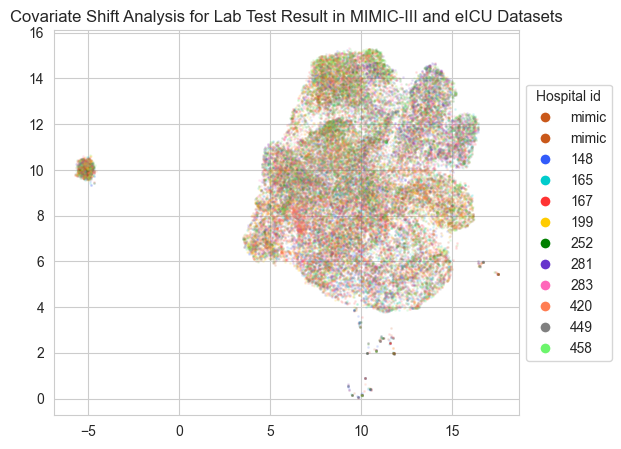

In [53]:
eicu_mimic_drugs = eicu_mimic[:, -12:]

final_np = draw_mimic_umap(eicu_mimic_drugs, 10, 0.2, title="Covariate Shift Analysis for Lab Test Result in MIMIC-III and eICU Datasets")

In [54]:
# import umap.umap_ as umap
# 
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.lines import Line2D
# 
# age_groups = eicu.columns[-20:-12]
# age_groups
# 
# eicu_mimic = eicu.to_numpy()
# mimic_ids = eicu_mimic[:, 1]
# 
# def draw_mimic_umap(x, n_neighbors, min_dist, title):
# 
#     reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
#                         random_state=np.random.RandomState(25),
#                         transform_seed=np.random.RandomState(25))
#     principal_components = reducer.fit_transform(x)
#     print(principal_components.shape)
#     print(eicu.to_numpy()[:, -20:-12].shape)
# 
#     eicu_np = eicu.to_numpy()
# 
#     final_np = np.hstack((principal_components, eicu_np[:, -20:-12], mimic_ids[:, None]))
#     print(final_np.shape)
# 
#     plt.figure(figsize=(6, 5))
# 
#     palette = [
#         '#ff3333',   # Red
#         '#ff7d52',   # Orange Red
#         '#ffcc00',   # Gold Yellow
#         '#6cf56c',   # Fresh Green
#         '#008000',   # Dark Green
#         '#00cccc',   # Dark Turquoise
#         '#325bfa',   # Royal Blue
#         '#6633cc',   # Blue Violet
#         '#ff66ba',    # Deep Pink
#         '#c9581a'    # Brown
#     ]
#     colors = sns.color_palette(palette, n_colors=8)
#     legend_elements = []
# 
#     final_eicu_np = final_np[final_np[:, -1] != -1]
#     final_mimic_np = final_np[final_np[:, -1] == -1]
# 
#     plot = plt.scatter(final_eicu_np[:, 0], final_eicu_np[:, 1], label="eICU", color="#808080", alpha=0.05, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="eICU")
#     legend_elements.append(legend_element)
# 
#     for age_group in range(len(age_groups)):
#         color = colors[age_group]
#         age_group_label = "MIMIC " + age_groups[age_group]
#         age_group_idx = age_group + 2
# 
#         print(age_group_label, age_group_idx)
# 
#         scatter_rows = final_mimic_np[final_mimic_np[:, age_group_idx] == 1]
# 
#         plot = plt.scatter(scatter_rows[:, 0], scatter_rows[:, 1], label=age_group_label, color=color, alpha=0.1, s=1.2)
#         legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=age_group_label)
#         legend_elements.append(legend_element)
# 
#     plt.title(title)
#     plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
#     # plt.grid(True)
#     plt.show()
# 
#     return final_np
# 
# eicu_mimic_drugs = eicu_mimic[:, 3:-31]
# 
# final_np = draw_mimic_umap(eicu_mimic_drugs, 10, 0.9, title="Covariate Shift Analysis for Drug Data in MIMIC-III and eICU Datasets")

In [55]:
gender_groups = eicu.columns[-22:-20]
gender_groups

Index(['sex_is_male', 'sex_is_female'], dtype='object')

In [56]:
# import umap.umap_ as umap
# 
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.lines import Line2D
# 
# gender_groups = eicu.columns[-22:-20]
# gender_groups
# 
# eicu_mimic = eicu.to_numpy()
# mimic_ids = eicu_mimic[:, 1]
# 
# def draw_mimic_umap(x, n_neighbors, min_dist, title):
# 
#     reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
#                         random_state=np.random.RandomState(25),
#                         transform_seed=np.random.RandomState(25))
#     principal_components = reducer.fit_transform(x)
#     print(principal_components.shape)
#     print(eicu.to_numpy()[:, -22:-20].shape)
# 
#     eicu_np = eicu.to_numpy()
# 
#     final_np = np.hstack((principal_components, eicu_np[:, -22:-20], mimic_ids[:, None]))
#     print(final_np.shape)
# 
#     plt.figure(figsize=(6, 5))
# 
#     palette = [
#         '#ff3333',   # Red
#         '#008000',   # Dark Green
#     ]
#     colors = sns.color_palette(palette, n_colors=2)
#     legend_elements = []
# 
#     final_eicu_np = final_np[final_np[:, -1] != -1]
#     final_mimic_np = final_np[final_np[:, -1] == -1]
# 
#     plot = plt.scatter(final_eicu_np[:, 0], final_eicu_np[:, 1], label="eICU", color="#808080", alpha=0.05, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="eICU")
#     legend_elements.append(legend_element)
# 
#     for gender_group in range(len(gender_groups)):
#         color = colors[gender_group]
#         gender_group_label = "MIMIC " + gender_groups[gender_group]
#         gender_group_idx = gender_group + 2
# 
#         print(gender_group_label, gender_group_idx)
# 
#         scatter_rows = final_mimic_np[final_mimic_np[:, gender_group_idx] == 1]
# 
#         plot = plt.scatter(scatter_rows[:, 0], scatter_rows[:, 1], label=gender_group_label, color=color, alpha=0.1, s=1.2)
#         legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=gender_group_label)
#         legend_elements.append(legend_element)
# 
#     plt.title(title)
#     plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
#     # plt.grid(True)
#     plt.show()
# 
#     return final_np
# 
# eicu_mimic_drugs = eicu_mimic[:, 3:-31]
# 
# final_np = draw_mimic_umap(eicu_mimic_drugs, 10, 0.9, title="Covariate Shift Analysis for Drug Data in MIMIC-III and eICU Datasets")

In [57]:
eicu.head()

,patientunitstayid,hospitalid,death,length_of_stay,acetamin,biotene,compazine,ferrous,imdur,lidocaine,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,79168,-1.0,0.0,0.070992,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-0.896483,1.848991,-0.180555,1.659113,0.104037,0.000000,2.202687,0.0
1,72723,-1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.986119,0.490553,-0.235778,0.000000,-1.099862,-0.024975,1.355242,0.017131,-1.022925,0.0
2,31288,-1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.423901,0.287244,-0.164078,0.000000,0.479571,0.0
3,68501,-1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.255570,-0.670585,0.000000,0.000000,0.062791,-0.006052,-0.730099,-0.691749,0.350242,0.0
4,84686,-1.0,0.0,0.142262,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.194317,-0.471832,0.000000,0.000000,-0.964670,-0.390806,-0.610936,-0.975302,-0.331904,0.0


In [58]:
eicu_np = eicu.to_numpy()
(eicu_np[:, 0])[:, None].shape

(39728, 1)

In [59]:
# import umap.umap_ as umap
# 
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.lines import Line2D
# 
# mimic_icu_stay = pd.read_csv('../data/mimic/ICUSTAYS.csv')
# mimic_icu_stay_patient = mimic_icu_stay['SUBJECT_ID'].unique()
# 
# eicu_mimic = eicu.to_numpy()
# mimic_ids = eicu_mimic[:, 1]
# 
# def draw_mimic_umap(x, n_neighbors, min_dist, title):
# 
#     reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
#                         random_state=np.random.RandomState(25),
#                         transform_seed=np.random.RandomState(25))
#     principal_components = reducer.fit_transform(x)
#     print(principal_components.shape)
#     print(eicu.to_numpy()[:, 0].shape)
# 
#     eicu_np = eicu.to_numpy()
# 
#     final_np = np.hstack((principal_components, (eicu_np[:, 0])[:, None], mimic_ids[:, None]))
#     print(final_np.shape)
# 
#     plt.figure(figsize=(6, 5))
# 
#     palette = [
#         '#ff3333',   # Red
#         '#008000',   # Dark Green
#     ]
#     colors = sns.color_palette(palette, n_colors=2)
#     legend_elements = []
#     
#     final_eicu_np = final_np[final_np[:, -1] != -1]
#     final_mimic_np = final_np[final_np[:, -1] == -1]
# 
#     final_icu_np = final_mimic_np[np.isin(final_mimic_np[:, 2], mimic_icu_stay_patient)]
#     final_non_icu_np = final_mimic_np[~np.isin(final_mimic_np[:, 2], mimic_icu_stay_patient)]
#     
#     plot = plt.scatter(final_eicu_np[:, 0], final_eicu_np[:, 1], label="eICU", color="#808080", alpha=0.05, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#808080", markersize=8, label="eICU")
#     legend_elements.append(legend_element)
# 
#     plot = plt.scatter(final_icu_np[:, 0], final_icu_np[:, 1], label="MIMIC ICU", color="#ff3333", alpha=0.1, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#ff3333", markersize=8, label="MIMIC ICU")
#     legend_elements.append(legend_element)
# 
#     plot = plt.scatter(final_non_icu_np[:, 0], final_non_icu_np[:, 1], label="MIMIC Non-ICU", color="#008000", alpha=0.1, s=1.2)
#     legend_element = Line2D([0], [0], marker='o', color='w', markerfacecolor="#008000", markersize=8, label="MIMIC Non-ICU")
#     legend_elements.append(legend_element)
# 
#     plt.title(title)
#     plt.legend(title="Hospital id", handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
#     # plt.grid(True)
#     plt.show()
# 
#     return final_np
# 
# eicu_mimic_drugs = eicu_mimic[:, 3:-31]
# 
# final_np = draw_mimic_umap(eicu_mimic_drugs, 10, 0.9, title="Covariate Shift Analysis for Drug Data in MIMIC-III and eICU Datasets")

In [60]:
# from sklearn.metrics.pairwise import pairwise_distances
# 
# unique_ids = np.unique(mimic_ids)
# 
# avg_distance_dict = np.zeros((len(unique_ids), len(unique_ids)))
# 
# for id in unique_ids:
# 
#     cluster1 = final_np[final_np[:,2] == id]
#     cluster1 = cluster1[:,[0,1]]
# 
#     id_pos = np.where(unique_ids == id)[0][0]
# 
#     for neighbour_id in unique_ids:
# 
#         # if neighbour_id == id:
#         #     continue
# 
#         # if str(int(id)) + " " + str(int(neighbour_id)) in avg_distance_dict:
#         #     continue
# 
#         # if str(int(neighbour_id)) + " " + str(int(id)) in avg_distance_dict:
#         #     continue
#         if id == neighbour_id:
#             avg_distances = 0.0
#         else:
#             cluster2 = final_np[final_np[:,2] == neighbour_id]
#             cluster2 = cluster2[:,[0,1]]
# 
#             distance = pairwise_distances(cluster1, cluster2)
#             distances = distance.reshape(-1)
#             avg_distances = np.median(distances)
#             avg_distances = avg_distances.item()
# 
#         neighbour_id_pos = np.where(unique_ids == neighbour_id)[0][0]
#         avg_distance_dict[id_pos, neighbour_id_pos] = avg_distances

In [61]:
# from matplotlib.colors import PowerNorm
# 
# plt.clf()
# plt.figure(figsize=(6, 3))
# plt.title("Hospital Cluster Distance using Median Linkage")
# 
# mask = np.triu(np.ones_like(avg_distance_dict))
# 
# labels = []
# for id in unique_ids:
#     if id == -1:
#         labels.append("MIMIC")
#     else:
#         labels.append(str(int(id)))
# 
# ax = sns.heatmap(avg_distance_dict, mask=mask, cmap="magma", cbar_kws={'shrink': 0.9})
# colorbar = ax.collections[0].colorbar
# colorbar.set_label("Distance")
# # colorbar.ax.tick_params(labelsize=6)
# ax.set_yticklabels(labels, rotation=0)
# ax.set_xticklabels(labels)
# plt.xlabel("Hospital id")
# plt.ylabel("Hospital id")
# plt.show()
# plt.close()

Percentage of drugs taken by patients in each hospital

In [62]:
# drug_taken_data = []
# for hospital_id in selected_hospitals:
#     hospital_data = eicu[eicu['hospitalid'] == hospital_id]
#     drugs = hospital_data.iloc[:, 5:242].to_numpy()
#     drugs_taken = np.sum(drugs, axis=1)
#     total_drugs = drugs.shape[1]
#     drugs_taken_percent = drugs_taken / total_drugs
#     drug_taken_data.append(drugs_taken_percent)
#
# plt.title("Percentage of taken drugs among all available drugs")
# bplot1 = plt.boxplot(drug_taken_data, patch_artist=True)
# for patch in bplot1['boxes']:
#     patch.set_facecolor("#9cd1ff")
# for median in bplot1['medians']:
#     median.set_color("#ff3255")
# # Change the color of whiskers
# for whisker in bplot1['whiskers']:
#     whisker.set_color('#1e5096')  # example: set all whiskers to purple
# # Change the color of the caps
# for cap in bplot1['caps']:
#     cap.set_color('#1e5096')  # example: set all caps to orange
# # Change the color of the fliers (outliers)
# for flier in bplot1['fliers']:
#     # flier.set_markerfacecolor('#003278')  # example: set all fliers to pink
#     flier.set_markeredgecolor('#1e5096')
# plt.xlabel("Hospital id")
# plt.ylabel("Percentage")
# plt.xticks(np.arange(len(selected_hospital_labels)) + 1, selected_hospital_labels)
# plt.show()

## Age

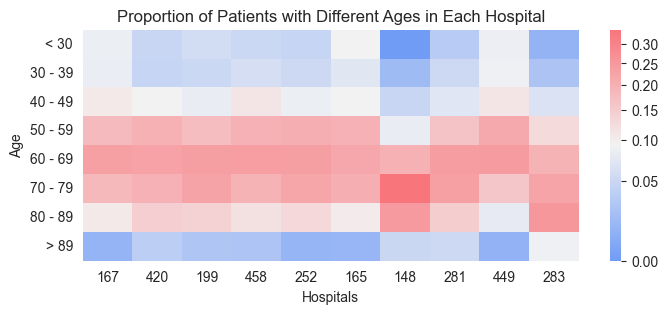

In [63]:
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns

age_labels = eicu.iloc[:, -20:-12].columns
age_heatmap = np.zeros(shape=(len(age_labels), len(selected_hospitals)))

hospital_labels = []
for idx, hospital_id in enumerate(selected_hospitals):

    hospital_data = eicu[eicu["hospitalid"] == hospital_id]
    age_data = (hospital_data.iloc[:, -20:-12]).to_numpy()
    total_patients = hospital_data.shape[0]
    total_age_patients = np.sum(age_data, axis=0)
    age_proportions = total_age_patients / total_patients
    age_heatmap[:, idx] = age_proportions

    hospital_labels.append(int(hospital_id))

plt.figure(figsize=(8, 3))
plt.title("Proportion of Patients with Different Ages in Each Hospital")
rdgn = sns.diverging_palette(h_neg=255, h_pos=10, s=90, l=65, sep=3, as_cmap=True)
ax = sns.heatmap(age_heatmap, cmap=rdgn, norm=PowerNorm(gamma=0.5))
ax.set_yticklabels(age_labels, rotation=0)
ax.set_xticklabels(hospital_labels)
plt.xlabel("Hospitals")
plt.ylabel("Age")
plt.show()

## Gender

'race_african', 'race_hispanic', 'race_caucasion', 'race_asian', 'race_native'

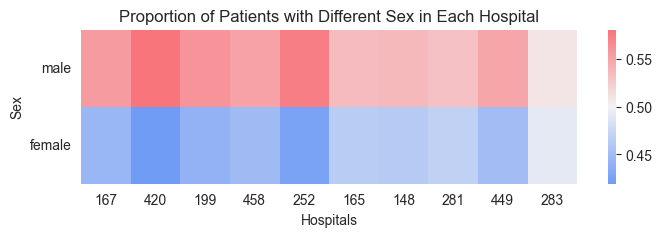

In [64]:
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns

sex_labels = ['male', 'female']
sex_heatmap = np.zeros(shape=(len(sex_labels), len(selected_hospitals)))

hospital_labels = []
for idx, hospital_id in enumerate(selected_hospitals):

    hospital_data = eicu[eicu["hospitalid"] == hospital_id]
    sex_data = (hospital_data.iloc[:, -22:-20]).to_numpy()
    total_patients = hospital_data.shape[0]
    total_sex_patients = np.sum(sex_data, axis=0)
    sex_proportions = total_sex_patients / total_patients
    sex_heatmap[:, idx] = sex_proportions

    hospital_labels.append(int(hospital_id))

plt.figure(figsize=(8, 2))
plt.title("Proportion of Patients with Different Sex in Each Hospital")
rdgn = sns.diverging_palette(h_neg=255, h_pos=10, s=90, l=65, sep=3, as_cmap=True)
ax = sns.heatmap(sex_heatmap, cmap=rdgn)
ax.set_yticklabels(sex_labels, rotation=0)
ax.set_xticklabels(hospital_labels)
plt.xlabel("Hospitals")
plt.ylabel("Sex")
plt.show()

## BMI

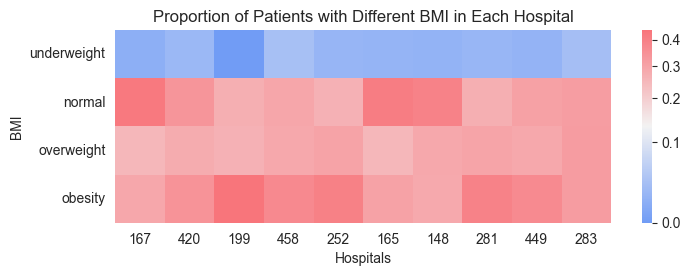

In [65]:
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns

bmi_labels = ["underweight", "normal", "overweight", "obesity"]
bmi_heatmap = np.zeros(shape=(len(bmi_labels), len(selected_hospitals)))
bmi_count = []

hospital_labels = []
for idx, hospital_id in enumerate(selected_hospitals):

    hospital_data = eicu[eicu["hospitalid"] == hospital_id]
    bmi_data = (hospital_data.iloc[:, -31:-27]).to_numpy()
    total_patients = hospital_data.shape[0]
    total_bmi_patients = np.sum(bmi_data, axis=0)
    bmi_proportions = total_bmi_patients / total_patients
    bmi_heatmap[:, idx] = bmi_proportions
    bmi_count.append(total_bmi_patients.tolist())

    hospital_labels.append(int(hospital_id))

plt.figure(figsize=(8, 2.5))
plt.title("Proportion of Patients with Different BMI in Each Hospital")
rdgn = sns.diverging_palette(h_neg=255, h_pos=10, s=90, l=65, sep=3, as_cmap=True)
ax = sns.heatmap(bmi_heatmap, cmap=rdgn, norm=PowerNorm(gamma=0.5))
ax.set_yticklabels(bmi_labels, rotation=0)
ax.set_xticklabels(hospital_labels)
plt.xlabel("Hospitals")
plt.ylabel("BMI")
plt.show()

In [66]:
# stats.f_oneway(*bmi_count)

# Race

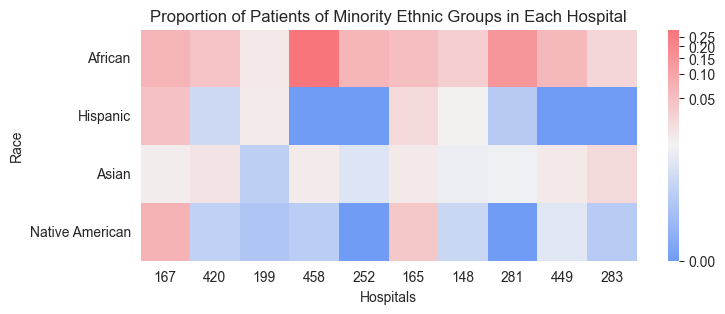

In [67]:
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns

race_labels = ['African', 'Hispanic', 'Asian', 'Native American']
race_heatmap = np.zeros(shape=(len(race_labels), len(selected_hospitals)))

hospital_labels = []
for idx, hospital_id in enumerate(selected_hospitals):

    hospital_data = eicu[eicu["hospitalid"] == hospital_id]
    race_data = (hospital_data.iloc[:, [245,246,248,249]]).to_numpy()
    total_patients = hospital_data.shape[0]
    total_race_patients = np.sum(race_data, axis=0)
    race_proportions = total_race_patients / total_patients
    race_heatmap[:, idx] = race_proportions

    hospital_labels.append(int(hospital_id))

plt.figure(figsize=(8, 3))
plt.title("Proportion of Patients of Minority Ethnic Groups in Each Hospital")
rdgn = sns.diverging_palette(h_neg=255, h_pos=10, s=90, l=65, sep=3, as_cmap=True)
ax = sns.heatmap(race_heatmap, cmap=rdgn, norm=PowerNorm(gamma=0.2))
ax.set_yticklabels(race_labels, rotation=0)
ax.set_xticklabels(hospital_labels)
plt.xlabel("Hospitals")
plt.ylabel("Race")
plt.show()

# Calculate F-Test

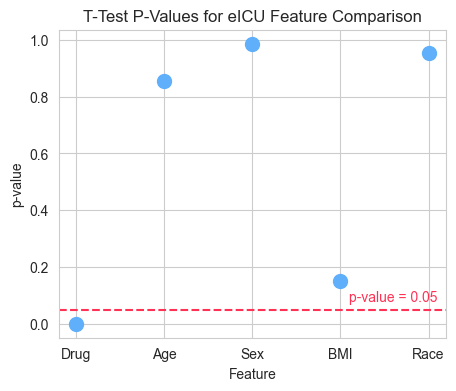

In [68]:
import scipy.stats as stats

total_feature_patients = np.zeros(shape=(len(selected_hospitals), len(eicu.columns[5:])))

for idx, hospital_id in enumerate(selected_hospitals):

    hospital_data = eicu[eicu["hospitalid"] == hospital_id]
    feature_data = (hospital_data.iloc[:, 5:]).to_numpy()
    total_patients = np.sum(feature_data, axis=0)
    total_feature_patients[idx] = total_patients

_, drug_p_value = stats.f_oneway(*[x.tolist() for x in total_feature_patients[:, :237]])
_, age_p_value = stats.f_oneway(*[x.tolist() for x in total_feature_patients[:, -8:]])
_, sex_p_value = stats.f_oneway(*[x.tolist() for x in total_feature_patients[:, 246:248]])
_, bmi_p_value = stats.f_oneway(*[x.tolist() for x in total_feature_patients[:, 237:241]])
_, race_p_value = stats.f_oneway(*[x.tolist() for x in total_feature_patients[:, 241:246]])
_, demographics_p_value = stats.f_oneway(*[x.tolist() for x in total_feature_patients[:, 237:]])

covariate_p_value = [drug_p_value, age_p_value, sex_p_value, bmi_p_value, race_p_value]
plt.figure(figsize=(5, 4))
plt.title("T-Test P-Values for eICU Feature Comparison")
plt.scatter(np.arange(len(covariate_p_value)), covariate_p_value, color="#5faffa", s=100)
plt.axhline(y=0.05, color='#ff3255', linestyle='--', label='y = 0.05')
plt.text(3.6, 0.08, 'p-value = 0.05', color='#ff3255', ha='center')
plt.xticks(np.arange(len(covariate_p_value)), ["Drug", "Age", "Sex", "BMI", "Race"])
plt.ylabel("p-value")
plt.xlabel("Feature")
plt.show()

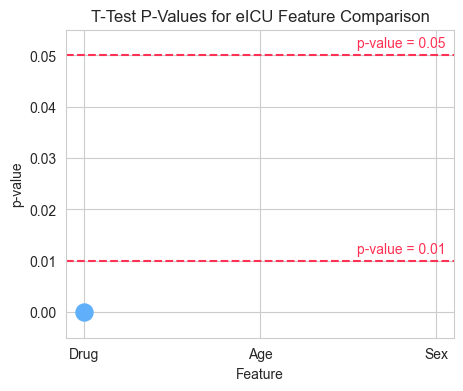

In [69]:
plt.figure(figsize=(5, 4))
plt.title("T-Test P-Values for eICU Feature Comparison")
plt.scatter(np.arange(len(covariate_p_value[:3])), covariate_p_value[:3], color="#5faffa", s=150)
plt.axhline(y=0.05, color='#ff3255', linestyle='--')
plt.text(1.8, 0.0515, 'p-value = 0.05', color='#ff3255', ha='center')
plt.axhline(y=0.01, color='#ff3255', linestyle='--')
plt.text(1.8, 0.0115, 'p-value = 0.01', color='#ff3255', ha='center')
plt.xticks(np.arange(len(covariate_p_value[:3])), ["Drug", "Age", "Sex"])
plt.ylabel("p-value")
plt.xlabel("Feature")
plt.ylim(-0.005, 0.055)
plt.show()

In [70]:
eicu.columns[list(range(5, 242)) + list(range(251, 253)) + list(range(-8, 0))]

Index(['biotene', 'compazine', 'ferrous', 'imdur', 'lidocaine',
       'milk of magnesia', 'nystatin', 'prochlorperazine', 'tamsulosin',
       'advair diskus',
       ...
       'sex_is_female', '< 30', 'albu_lab', 'bands', 'bun', 'hct', 'inr',
       'lactate', 'platelets', 'wbc'],
      dtype='object', length=247)

In [71]:
eicu.iloc[:, list(range(5, 242)) + list(range(251, 253)) + list(range(-8, 0))]

,biotene,compazine,ferrous,imdur,lidocaine,milk of magnesia,nystatin,prochlorperazine,tamsulosin,advair diskus,...,sex_is_female,< 30,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.896483,1.848991,-0.180555,1.659113,0.104037,0.000000,2.202687,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.235778,0.000000,-1.099862,-0.024975,1.355242,0.017131,-1.022925,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.000000,-0.423901,0.287244,-0.164078,0.000000,0.479571,0.000000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.000000,0.062791,-0.006052,-0.730099,-0.691749,0.350242,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,-0.964670,-0.390806,-0.610936,-0.975302,-0.331904,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.298785,0.000000,1.406813,-0.542723,-0.696086,0.000000,-0.018450,0.576293
39724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,-0.381034,2.712155,0.000000,0.000000,-0.741848,-1.088310
39725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.989594,0.000000,-0.162671,0.735431,0.089754,0.000000,-0.629409,-0.523876
39726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.506028,0.000000,1.036889,-0.266365,-0.744181,0.897957,-0.190146,1.458979


In [1]:
import pandas as pd

eicu_time = pd.read_csv('../data/eicu_mimic_lab_time.csv')


In [2]:
eicu_time.head()

,Unnamed: 0,patientunitstayid,hospitalid,time_window,death,ventilator,sepsis,acetamin,biotene,compazine,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
0,0.0,107.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.235778,0.0,2.361057,-0.753484,-0.968423,0.0,-0.669173,0.0
1,0.0,107.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,-0.062819,0.000000,0.0,0.000000,0.0
2,0.0,107.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,2.361057,-0.450727,0.000000,0.0,-0.859362,0.0
3,0.0,107.0,-1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.239938,0.000000,0.0,0.000000,0.0
4,0.0,107.0,-1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.441329,-0.895402,-0.968423,0.0,-0.691995,0.0


In [4]:
eicu_time[(eicu_time["hospitalid"] != -1) & (eicu_time["hospitalid"] != -2) & (eicu_time["ventilator"] == 1.0)]

,Unnamed: 0,patientunitstayid,hospitalid,time_window,death,ventilator,sepsis,acetamin,biotene,compazine,...,paco2,ph,albu_lab,bands,bun,hct,inr,lactate,platelets,wbc
34812,0.0,534765.0,148.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.844327,-1.564003,0.000000,-0.3788,-0.326443,-0.734638,-0.593025,-0.235366,2.444322,2.432230
34833,0.0,535557.0,148.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.528188,-1.899427,0.000000,0.0000,-0.617594,0.000000,0.000000,-1.043813,0.000000,0.000000
34835,0.0,535557.0,148.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.035779,0.217936,-0.530186,0.0000,-1.281781,0.148171,0.000000,0.000000,-0.694505,-0.514309
34837,0.0,535557.0,148.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-0.668347,0.0000,-1.363667,0.086758,0.000000,0.000000,-0.514602,-0.055108
34847,0.0,535576.0,148.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.095726,0.060706,0.713270,0.0000,-0.653988,0.654826,0.000000,-0.894101,-0.770253,0.844160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278090,0.0,3247417.0,449.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.886699,-0.905135,0.000000,0.0000,0.765372,0.869771,0.000000,-0.415021,1.019304,0.882427
278091,0.0,3247417.0,449.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.185255,0.899266,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
278092,0.0,3247417.0,449.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.409077,0.742036,-0.668347,0.0000,0.492418,-0.051421,0.000000,0.000000,0.347036,-0.035975
278093,0.0,3247417.0,449.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
eicu_treatment = pd.read_csv("../data/eicu/treatment.csv")
eicu_ventilation = eicu_treatment[eicu_treatment["treatmentstring"].str.contains("ventilation")]
patient_counts = eicu_ventilation["patientunitstayid"].value_counts()
unique_patients_more_than_one = patient_counts[patient_counts > 1].count()
total_unique_patients = eicu_ventilation["patientunitstayid"].nunique()
unique_patients_more_than_one, total_unique_patients, unique_patients_more_than_one / total_unique_patients

(46534, 71098, 0.6545050493684773)